In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

# Reading Data

In [14]:
def get_img_list(folder):
    folder = folder + '/'
    class_list = os.listdir(folder)
    class_list.remove('.DS_Store')
    class_dict = dict(zip(class_list, list(range(0,len(class_list)))))
    image_list = []
    for cls in class_list:
        images = os.listdir(folder + cls)
        for i in images:
            img = cv2.imread(folder + cls + '/' + i)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img,(128,128))
            image_list.append(img)
    image_array = np.array(image_list)
    image_array = image_array.astype('float32')
    image_array /= 255
    return class_list, class_dict, image_array
    
class_list, class_dict, image_array = get_img_list('data')

1803

Now let's take a look at some of the data

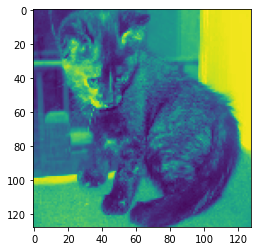

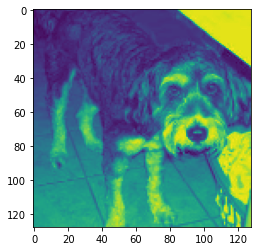

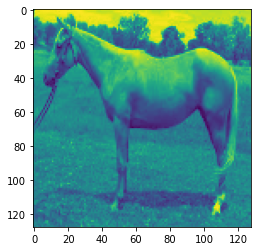

In [16]:
for i in range (0,3):
    n = random.randint(0, len(image_array))
    plt.imshow(image_array[n]) 
    plt.show()
    
    
# import random
# for i in range(0,5):
#     n = random.randint(1,len(X_train))
#     plt.imshow(X_train[i], cmap=plt.cm.binary)
#     class_index = int(np.flatnonzero(y_train[i]))
#     print(class_list[class_index])
#     plt.show()

In [17]:
print (class_list)

['dogs', 'cats', 'bike', 'flowers', 'horses', 'cars', 'human']


In [18]:
print(class_dict)

{'dogs': 0, 'cats': 1, 'bike': 2, 'flowers': 3, 'horses': 4, 'cars': 5, 'human': 6}


In [23]:
def get_labels():
    labels = np.ones((image_array.shape[0]), dtype='int')
    count=0
    for cls in class_list:
        images = os.listdir('data/' + cls)
        labels[count:(len(images)+count)] = class_dict[cls]
        count += len(images)
#         print(len(images))
#         print(count)
    return labels

labels = get_labels()

In [24]:
labels

array([0, 0, 0, ..., 6, 6, 6])

In [25]:
len(labels)

1803

dogs


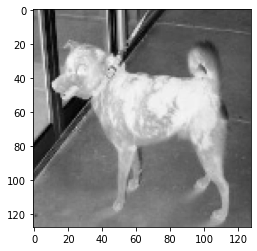

dogs


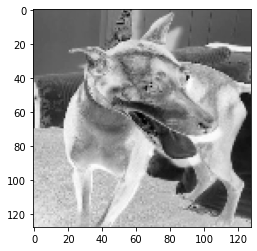

cats


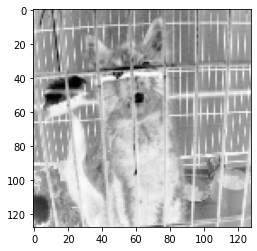

cats


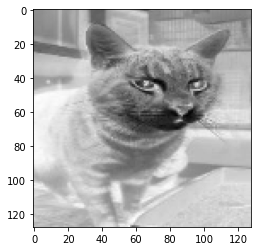

bike


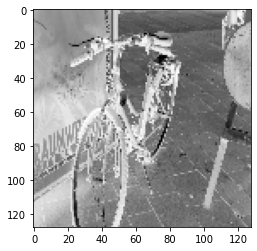

bike


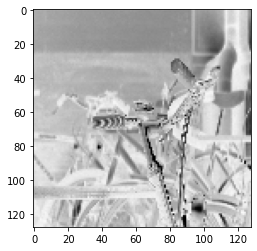

flowers


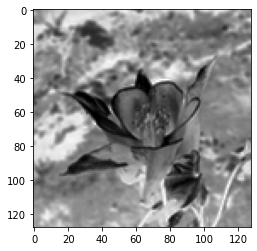

flowers


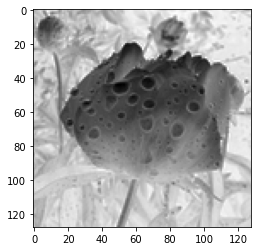

horses


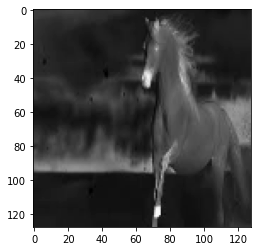

horses


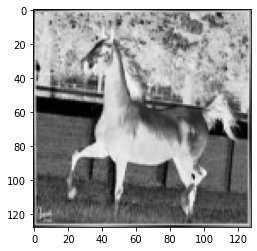

cars


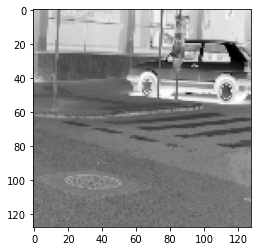

cars


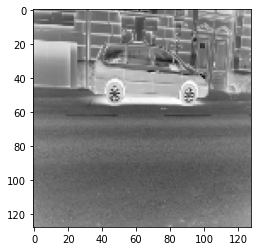

human


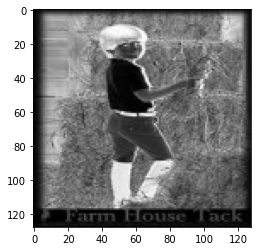

human


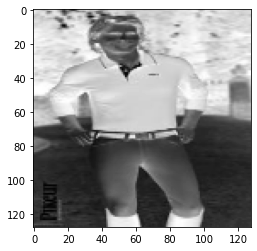

In [26]:
# Dog0 0-202

for i in range (200,202):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Cat1 202-404

for i in range (402,404):
    plt.imshow(image_array[i], cmap=plt.cm.binary)
    print(class_list[labels[i]])
    plt.show()

# Bike2 404-769

for i in range (767,769):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Flower3 769-976

for i in range (974,976):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Horse4 976-1181

for i in range (1179,1181):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Car5 1181-1601

for i in range (1599,1601):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])   
    plt.show()

# Human6 1601-1803

for i in range (1801,1803):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

1803

NameError: name 'plt' is not defined

(1803, 128, 128)

{'dogs': 0, 'cats': 1, 'bike': 2, 'flowers': 3, 'horses': 4, 'cars': 5, 'human': 6}


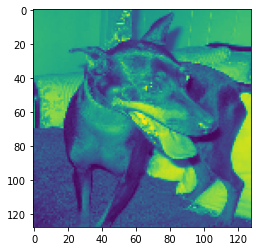

dogs


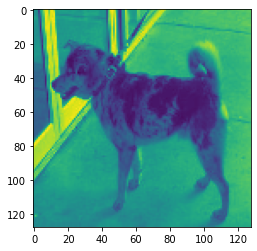

dogs


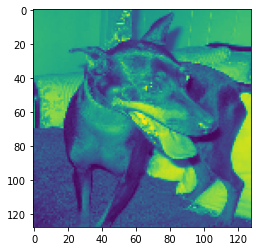

cats


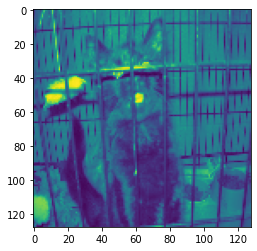

cats


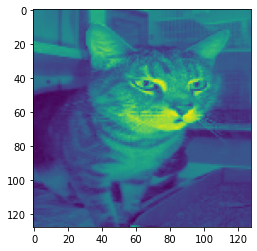

bike


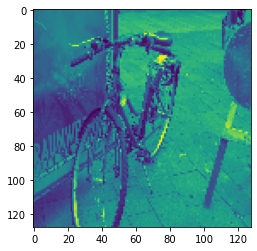

bike


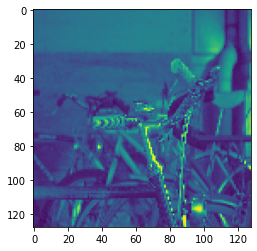

flowers


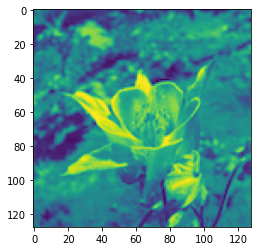

flowers


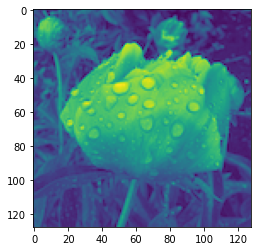

horses


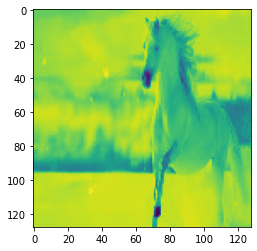

horses


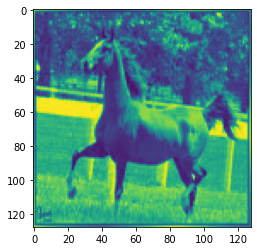

cars


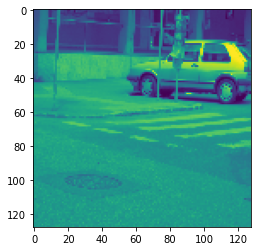

cars


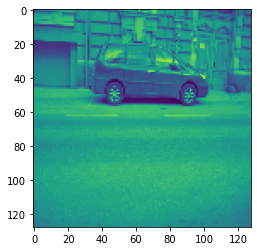

human


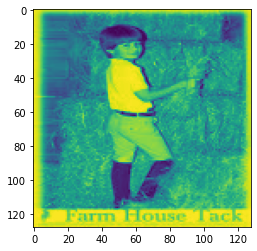

human


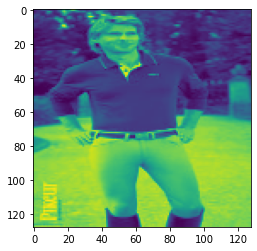

In [27]:
# Dog0 0-202

for i in range (200,202):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])
    plt.show()

# Cat1 202-404

for i in range (402,404):
    plt.imshow(image_array[i])
    print(class_list[labels[i]])
    plt.show()

# Bike2 404-769

for i in range (767,769):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])
    plt.show()

# Flower3 769-976

for i in range (974,976):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])
    plt.show()

# Horse4 976-1181

for i in range (1179,1181):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])
    plt.show()

# Car5 1181-1601

for i in range (1599,1601):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])   
    plt.show()

# Human6 1601-1803

for i in range (1801,1803):
    plt.imshow(image_array[i]) 
    print(class_list[labels[i]])
    plt.show()

In [13]:
from keras.utils import np_utils

y = np_utils.to_categorical(labels, len(class_list))

length_counts = []

for i in y:
    if len(i) not in length_counts:
        length_counts.append(len(i))
length_counts

[7]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array, y, test_size=0.15, random_state=42, shuffle=True)

In [28]:
import random
for i in range(0,5):
    n = random.randint(1,len(X_train))
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    class_index = int(np.flatnonzero(y_train[i]))
    print(class_list[class_index])
    plt.show()

NameError: name 'X_train' is not defined

In [16]:
# Flatten

# X_train = X_train.reshape(len(X_train), 128**2).astype('float32')
# X_test = X_test.reshape(len(X_test), 128**2).astype('float32')

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1532, 128, 128)
X_test shape = (271, 128, 128)


In [17]:
image_array.shape

(1803, 128, 128)

In [18]:
input_shape=image_array[0].shape
# input_shape = image_array.shape[0]

# input_shape = np.expand_dims(input_shape, axis=0)
input_shape

(128, 128)

In [19]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import Conv2D, Conv1D

cnn_model = Sequential([
    Conv2D(32,1,1,padding='same',activation='relu',input_shape = (128, 128, 1)),
    Conv2D(32,1,1,activation='LeakyReLU'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(len(class_list), activation = 'softmax')
])




Metal device set to: Apple M1 Pro


2022-05-16 18:08:09.319899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 18:08:09.320028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['acc'])


In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      64        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                        

In [22]:
num_channel=1
num_epoch=200

In [23]:
hist = cnn_model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

Epoch 1/200


2022-05-16 18:08:09.473413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/48 [..............................] - ETA: 18s - loss: 1.8997 - acc: 0.2812

2022-05-16 18:08:09.677435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - ETA: 0s - loss: 1.9280 - acc: 0.1886

2022-05-16 18:08:13.906151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 5s 97ms/step - loss: 1.9280 - acc: 0.1886 - val_loss: 1.8979 - val_acc: 0.2325
Epoch 2/200
48/48 [==============================] - 4s 89ms/step - loss: 1.9001 - acc: 0.2454 - val_loss: 1.8837 - val_acc: 0.2325
Epoch 3/200
48/48 [==============================] - 4s 89ms/step - loss: 1.8870 - acc: 0.2474 - val_loss: 1.8773 - val_acc: 0.2325
Epoch 4/200
48/48 [==============================] - 4s 89ms/step - loss: 1.8756 - acc: 0.2369 - val_loss: 1.8712 - val_acc: 0.2362
Epoch 5/200
48/48 [==============================] - 4s 90ms/step - loss: 1.8707 - acc: 0.2500 - val_loss: 1.8660 - val_acc: 0.2362
Epoch 6/200
48/48 [==============================] - 4s 89ms/step - loss: 1.8612 - acc: 0.2441 - val_loss: 1.8598 - val_acc: 0.2362
Epoch 7/200
48/48 [==============================] - 4s 89ms/step - loss: 1.8558 - acc: 0.2709 - val_loss: 1.8547 - val_acc: 0.2399
Epoch 8/200
48/48 [==============================] - 4s 89ms/step - loss: 1.8471 - acc: 

Epoch 63/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6312 - acc: 0.4164 - val_loss: 1.6650 - val_acc: 0.4170
Epoch 64/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6271 - acc: 0.4217 - val_loss: 1.6693 - val_acc: 0.4207
Epoch 65/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6245 - acc: 0.4132 - val_loss: 1.6649 - val_acc: 0.4207
Epoch 66/200
48/48 [==============================] - 4s 88ms/step - loss: 1.6241 - acc: 0.4145 - val_loss: 1.6604 - val_acc: 0.4207
Epoch 67/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6167 - acc: 0.4164 - val_loss: 1.6632 - val_acc: 0.4244
Epoch 68/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6139 - acc: 0.4230 - val_loss: 1.6602 - val_acc: 0.4170
Epoch 69/200
48/48 [==============================] - 4s 89ms/step - loss: 1.6186 - acc: 0.4282 - val_loss: 1.6557 - val_acc: 0.4170
Epoch 70/200
48/48 [==============================] - 4s 89ms/step - 

48/48 [==============================] - 4s 88ms/step - loss: 1.4302 - acc: 0.5059 - val_loss: 1.5228 - val_acc: 0.4539
Epoch 186/200
48/48 [==============================] - 4s 89ms/step - loss: 1.4211 - acc: 0.5085 - val_loss: 1.5209 - val_acc: 0.4539
Epoch 187/200
48/48 [==============================] - 4s 89ms/step - loss: 1.4223 - acc: 0.5059 - val_loss: 1.5204 - val_acc: 0.4502
Epoch 188/200
48/48 [==============================] - 4s 89ms/step - loss: 1.4184 - acc: 0.5144 - val_loss: 1.5181 - val_acc: 0.4613
Epoch 189/200
48/48 [==============================] - 4s 89ms/step - loss: 1.4254 - acc: 0.5033 - val_loss: 1.5220 - val_acc: 0.4613
Epoch 190/200
48/48 [==============================] - 4s 89ms/step - loss: 1.4133 - acc: 0.5235 - val_loss: 1.5197 - val_acc: 0.4539
Epoch 191/200
48/48 [==============================] - 4s 88ms/step - loss: 1.4152 - acc: 0.5183 - val_loss: 1.5192 - val_acc: 0.4613
Epoch 192/200
48/48 [==============================] - 4s 89ms/step - loss: 

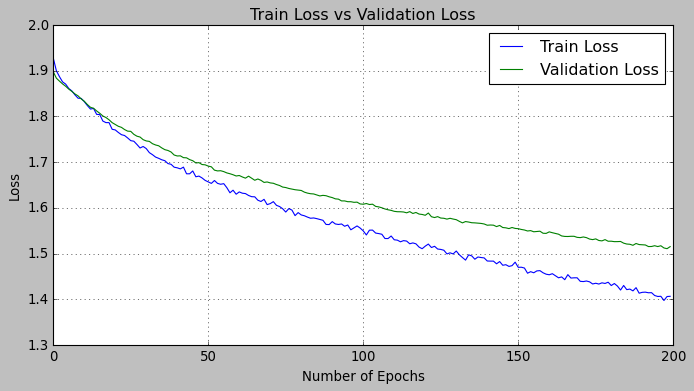

In [32]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use('classic')

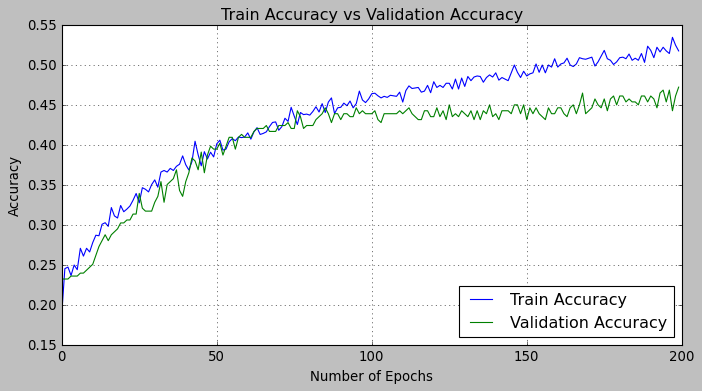

In [33]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)

In [34]:

score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.515159010887146
Test Accuracy: 0.4723247289657593


[[0.1819286  0.15096831 0.19342422 0.1733741  0.10198843 0.1251774
  0.07313892]]
[[0. 0. 0. 1. 0. 0. 0.]]


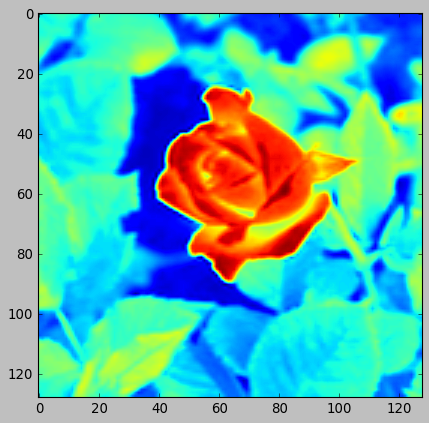

In [35]:
test_image = X_test[0:1]
# print (test_image.shape)
print(cnn_model.predict(test_image))
prediction = cnn_model.predict(test_image)
print(y_test[0:1])

image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
print(class_dict)
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=class_dict))

[[0.18192871 0.15096854 0.19342442 ... 0.10198857 0.12517695 0.07313918]
 [0.09737223 0.07039259 0.32229105 ... 0.10930359 0.07874686 0.10571183]
 [0.07071325 0.05932612 0.13069746 ... 0.10895452 0.5593435  0.04957252]
 ...
 [0.16507258 0.09694591 0.1300945  ... 0.2352365  0.29197067 0.071964  ]
 [0.06158293 0.06528611 0.10919932 ... 0.05723784 0.64889276 0.05013816]
 [0.11206748 0.10537715 0.23975973 ... 0.20918904 0.17905854 0.1331255 ]]
[2 2 5 2 4 2 2 6 2 5 4 5 2 2 4 4 5 6 5 5 3 6 6 2 4 5 5 5 4 5 5 5 5 4 3 5 5
 4 5 3 3 4 6 6 3 5 4 2 2 5 3 3 6 2 2 5 5 5 5 4 6 5 3 4 3 2 5 2 6 6 5 2 6 4
 5 5 5 2 5 2 2 5 5 5 4 5 5 2 3 2 2 2 2 4 6 3 3 2 3 2 5 2 2 4 5 3 6 2 4 2 6
 4 6 4 2 2 3 2 2 3 3 5 3 5 2 3 3 4 6 2 2 5 5 4 4 5 3 6 2 5 2 5 2 3 2 5 5 3
 2 5 0 5 2 5 5 5 4 2 5 5 5 4 5 2 5 5 5 5 3 5 5 4 5 3 6 4 2 2 5 6 2 2 4 3 2
 2 5 4 5 5 2 5 2 5 5 3 3 5 5 2 2 5 5 5 6 3 2 5 2 3 5 3 5 5 6 3 5 6 3 4 5 5
 1 4 2 2 2 3 6 5 5 3 4 2 2 2 5 6 3 5 3 5 5 2 5 4 5 4 2 2 3 3 6 2 2 5 2 5 3
 5 5 5 0 6 2 4 0 2 5 5 2]
{'dog